<a href="https://colab.research.google.com/github/felix7974/-/blob/main/4_1_cardio_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-1. 심혈관 질환 데이터 세트(Cardiovascular Disease dataset)
- Draft written by Seunghun Shin, revised by Hyeonseung Im
- 먼저 아래 링크에서 데이터를 다운로드할 것(로그인이 필요할 경우 로그인)
- 다운로드 후 좌측에 파일 업로드를 통해 다운로드한 데이터를 업로드
- Data download : https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/download?datasetVersionNumber=1

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras

import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

2.11.0


## 탐색적 데이터 분석

In [ ]:
df = pd.read_csv('/content/cardio_train.csv', sep=';')

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00
mean,49972.42,19468.87,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.80,0.50
std,28851.30,2467.25,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.40,0.50
min,0.00,10798.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,25006.75,17664.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
50%,50001.50,19703.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
75%,74889.25,21327.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.00,1.00
max,99999.00,23713.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.00,1.00


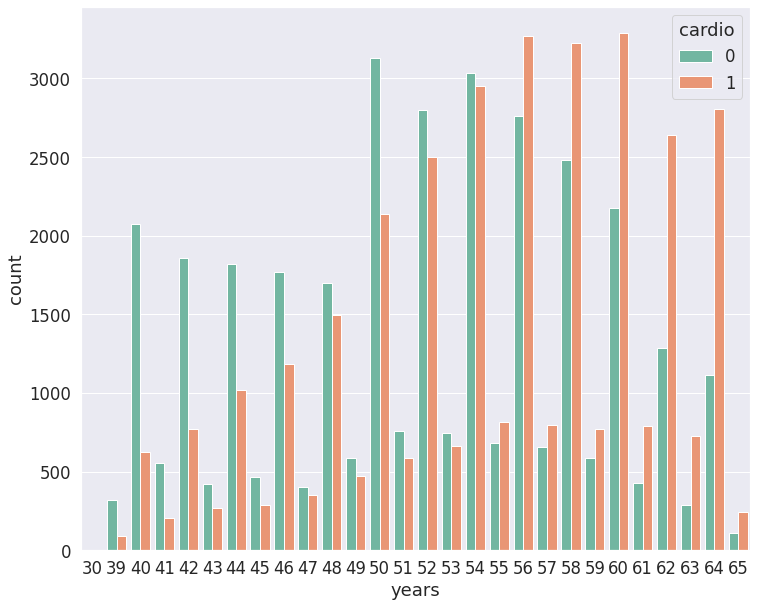

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 10
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# age 변수가 days 단위로 되어있어 years 단위로 변경

df['years'] = (df['age']/365).round().astype('int')

sns.set(font_scale=1.5)
sns.countplot(x='years', hue='cardio', data = df, palette="Set2")

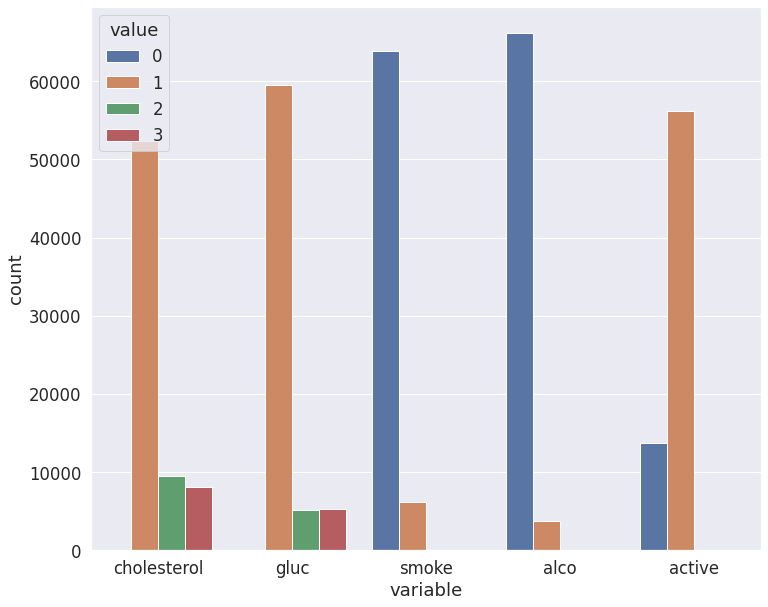

In [ ]:
df_cat = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_cat));

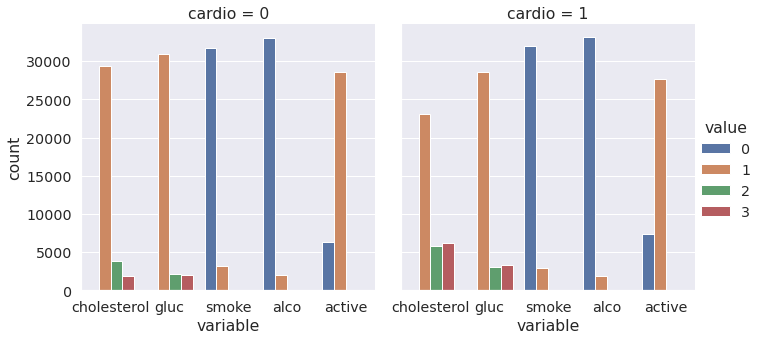

In [ ]:
df_num = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'])
sns.set(font_scale=1.3)
sns.catplot(x="variable", hue="value", col="cardio", data=df_num, kind="count")

In [ ]:
df.groupby('gender')['height'].mean()

gender
1   161.36
2   169.95
Name: height, dtype: float64

In [ ]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [ ]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

In [ ]:
df['cardio'].value_counts(normalize=True)

0   0.50
1   0.50
Name: cardio, dtype: float64

In [ ]:
pd.crosstab(df['cardio'], df['gender'], normalize=True)

gender,1,2
cardio,,
0,0.33,0.17
1,0.32,0.18


In [ ]:
df.isnull().values.any()

False

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00
mean,49972.42,19468.87,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.80,0.50,53.34
std,28851.30,2467.25,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.40,0.50,6.77
min,0.00,10798.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.00,0.00,30.00
25%,25006.75,17664.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00,48.00
50%,50001.50,19703.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00,54.00
75%,74889.25,21327.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.00,1.00,58.00
max,99999.00,23713.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.00,1.00,65.00


## describe 결과 데이터에 이상치가 있는 것으로 판단됨 -> 전처리 필요

In [ ]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) |
           (df['height'] < df['height'].quantile(0.025))].index, inplace=True)

df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) |
           (df['weight'] < df['weight'].quantile(0.025))].index, inplace=True)


In [ ]:
df[df['ap_lo'] > df['ap_hi']].shape[0]

1082

In [ ]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) |
           (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index, inplace=True)

df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) |
           (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index, inplace=True)

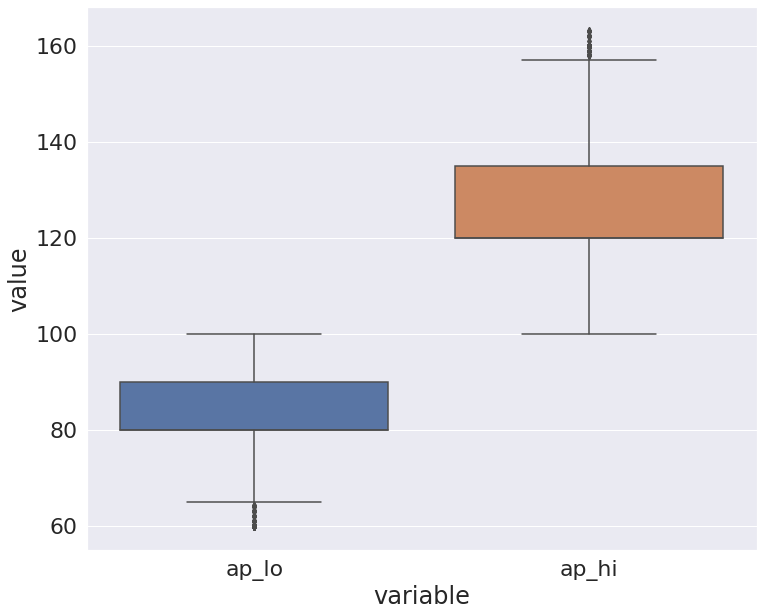

In [ ]:
blood_pressure = df.loc[:, ['ap_lo', 'ap_hi']]
sns.set(font_scale=2)
sns.boxplot(x = 'variable', y = 'value', data = blood_pressure.melt())

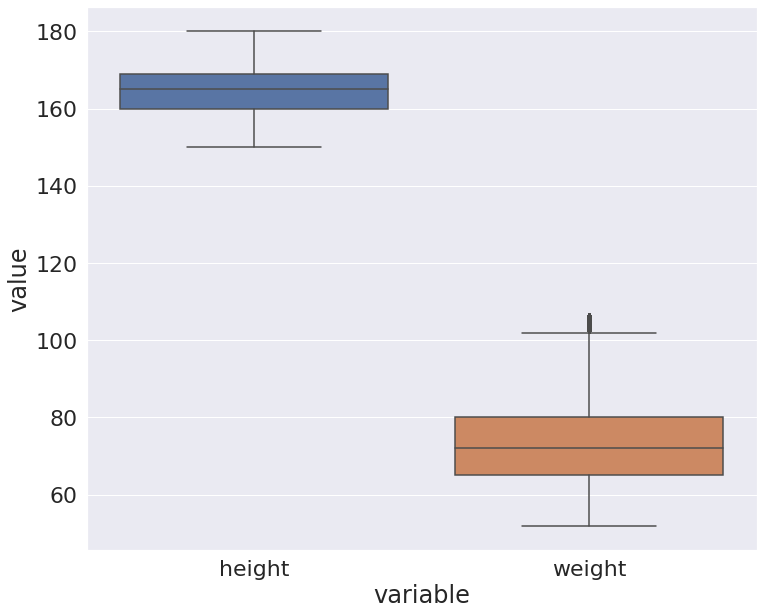

In [ ]:
h_w = df.loc[:, ['height', 'weight']]
sns.boxplot(x = 'variable', y = 'value', data = h_w.melt())

In [ ]:
# 이상치가 제거되었는지 확인
df[df['ap_lo']> df['ap_hi']].shape[0]

0

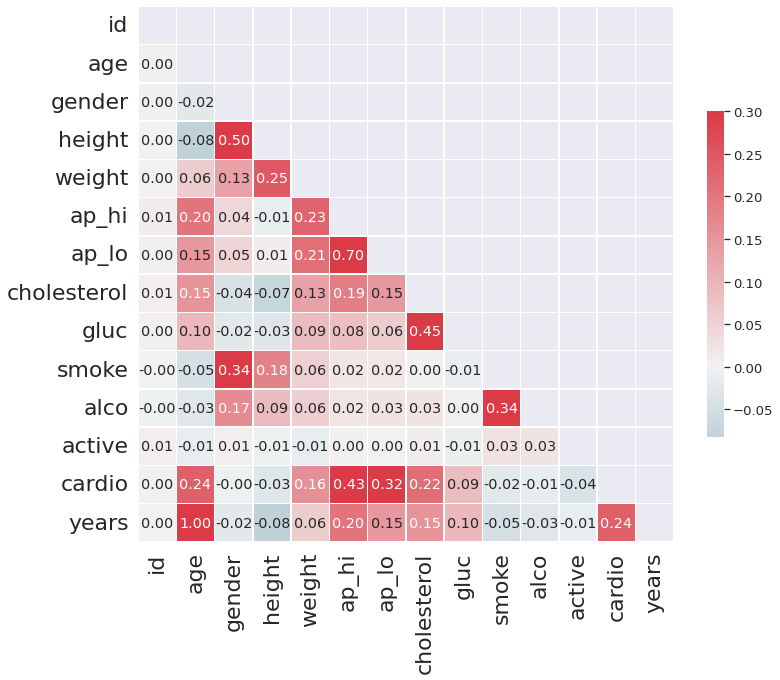

In [ ]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(12, 12))

sns.set(font_scale=1.2)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

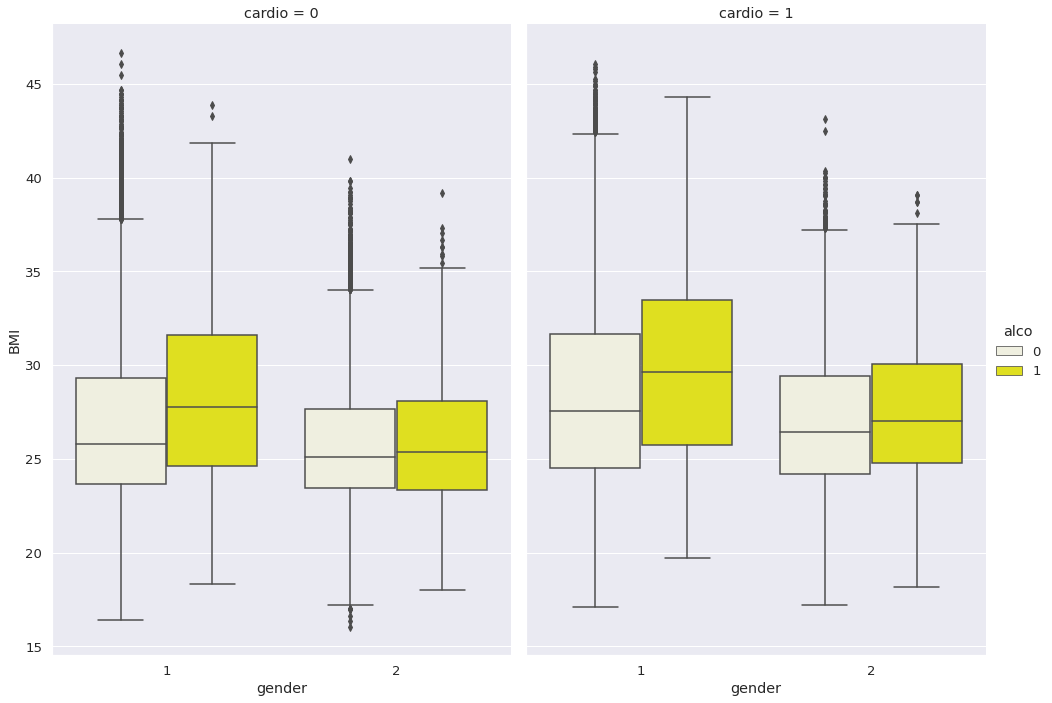

In [ ]:
# Create a new feature : Body Mass Index(BMI)

df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow", kind="box", height=10, aspect=.7)

In [ ]:
df.shape

(60142, 15)

In [ ]:
cleaned_df = df.copy()

## DNN 모델 훈련 및 예측
- 데이터 세트를 학습, 검증 및 테스트 세트로 분할
- 테스트 세트는 훈련 단계에서는 전혀 사용되지 않으며 마지막에만 사용되어 일반화 성능을 평가
- train/test 분할은 과대적합의 문제를 해결하기 위해 중요함

In [ ]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

y_train = np.array(train_df.pop('cardio'))
y_val = np.array(val_df.pop('cardio'))
y_test = np.array(test_df.pop('cardio'))
X_train = np.array(train_df)
X_val = np.array(val_df)
X_test = np.array(test_df)

In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

In [ ]:
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

print()

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

y_train shape: (38490,)
y_val shape: (9623,)
y_test shape: (12029,)

X_train shape: (38490, 14)
X_val shape: (9623, 14)
X_test shape: (12029, 14)


In [ ]:
METRICS = [
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
]

In [ ]:
def make_model(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[-1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(.3),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(.3),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)

    return model

In [ ]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,921
Trainable params: 25,921
Non-traina

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val))

Epoch 1/100
19/19 [==============================] - 4s 53ms/step - loss: 0.6665 - accuracy: 0.6026 - precision: 0.5820 - recall: 0.6635 - auc: 0.6528 - val_loss: 0.6166 - val_accuracy: 0.6846 - val_precision: 0.6740 - val_recall: 0.6912 - val_auc: 0.7398
Epoch 2/100
19/19 [==============================] - 1s 28ms/step - loss: 0.6054 - accuracy: 0.6838 - precision: 0.6796 - recall: 0.6682 - auc: 0.7360 - val_loss: 0.5796 - val_accuracy: 0.7107 - val_precision: 0.7320 - val_recall: 0.6470 - val_auc: 0.7642
Epoch 3/100
19/19 [==============================] - 1s 29ms/step - loss: 0.5812 - accuracy: 0.7082 - precision: 0.7202 - recall: 0.6592 - auc: 0.7626 - val_loss: 0.5676 - val_accuracy: 0.7152 - val_precision: 0.7350 - val_recall: 0.6554 - val_auc: 0.7778
Epoch 4/100
19/19 [==============================] - 0s 26ms/step - loss: 0.5718 - accuracy: 0.7159 - precision: 0.7289 - recall: 0.6668 - auc: 0.7736 - val_loss: 0.5655 - val_accuracy: 0.7190 - val_precision: 0.7599 - val_recall: 0

In [ ]:
train_predictions = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions = model.predict(X_test, batch_size=BATCH_SIZE)

6/6 [==============================] - 0s 6ms/step


In [ ]:
def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history. epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history. epoch, history.history['val_'+metric],
                 color=colors[1], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, 1])
        elif metric == 'auc':
            plt.ylim([0.2,1])
        else:
            plt.ylim([0,1])

        plt.legend()

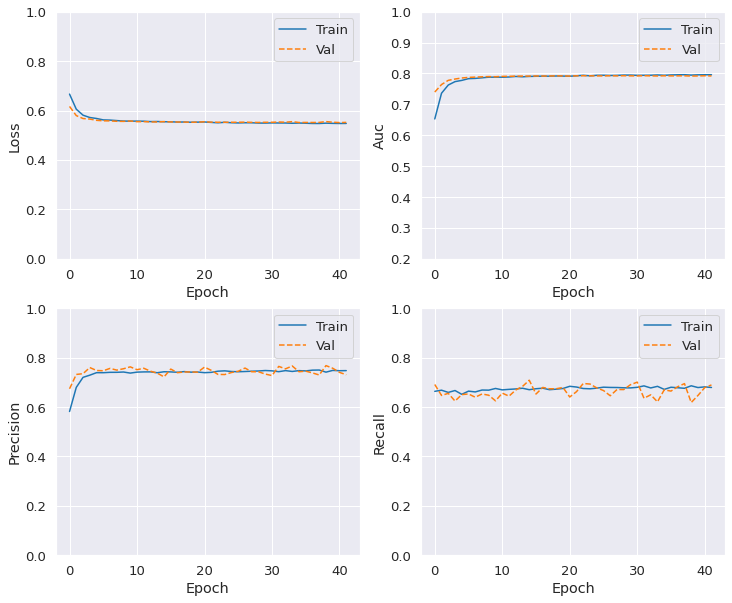

In [ ]:
plot_metrics(history)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])

loss:  0.5541
accuracy:  0.7249
precision:  0.7529
recall:  0.6432
auc:  0.7892

True Negatives:  4972
False Positives:  1230
False Negatives:  2079
True Positives:  3748


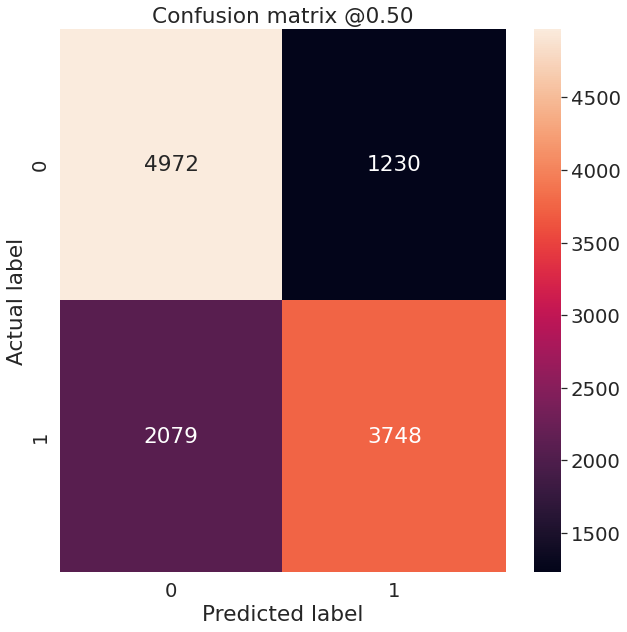

In [ ]:
results = model.evaluate(X_test, y_test,
                        batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, results):
    print(f'{name}:  {value:.4f}')
print()

sns.set(font_scale=1.8)
plot_cm(y_test, test_predictions)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

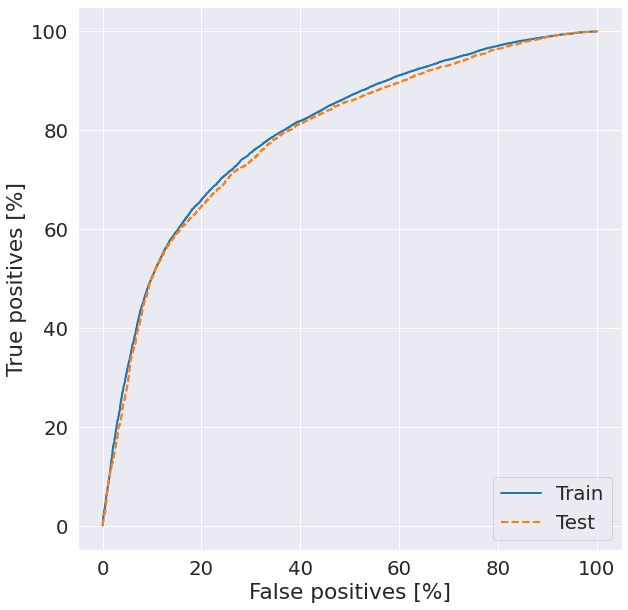

In [ ]:
plot_roc("Train", y_train, train_predictions, color=colors[0])
plot_roc("Test", y_test, test_predictions, color=colors[1], linestyle='--')
plt.legend(loc='lower right');